<a href="https://colab.research.google.com/github/mainarel/Numerical_Methods_6/blob/main/4_NL__transport_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Линейный перенос прямоугольного профиля:**

In [34]:
def f(u, aa):
  return aa * u

def a(u, aa):
  return aa

def phi(x):
  return np.heaviside(x - 1, 1) * np.heaviside(2 - x, 1)

def layer(prev, xrange, h, tau, const):
    layerr = np.zeros(len(xrange))
    for i in range(1, len(xrange) - 1):
        layerr[i] = 1/2 *(prev[i+1] + prev[i-1]) - tau/(2*h) * (f(prev[i+1], const) - f(prev[i-1], const))
        
    return layerr


OK


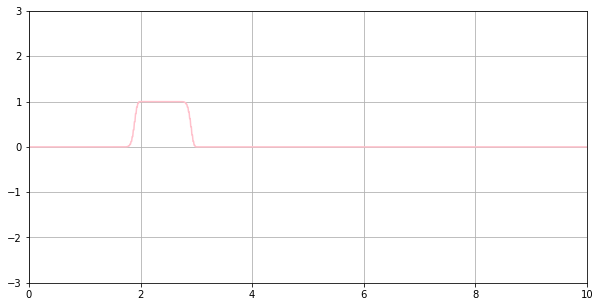

In [35]:
from matplotlib.animation import FuncAnimation, PillowWriter

aa = 2
h = 0.01
xmin = 0
xmax = 10

C = 0.9
tau = (C * h) / aa

xn = np.arange(xmin, xmax + h, h)
u1 = phi(xn)
u2 = layer(u1, xn, h, tau, aa)


# C =  tau**(len(u2)) * (a(u2, aa)) / h
if C <= 1:
  print ('OK')


fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(0, 10), ylim=(-3, 3))
ax.grid(True)
line, = ax.plot([], [], color = 'pink')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global u1,u2
    if i == 0:
        y = u1
    elif i == 1:
        y = u2
    else:
        u1 = np.copy(u2)
        tau = (C * h) / aa
        u2 = layer(u1, xn, h, tau, aa)
        y = u2

    line.set_data(xn, y)
    return line,

anim1 = FuncAnimation(fig, animate, init_func=init,
                      frames=100, interval=50, blit=True)

anim1.save('wave1.gif', writer='pillow')

# **Нелинейный перенос с разрывным решением (с опрокидыванием волны):**

In [44]:
def f(u, aa):
  return u**2 / 2

def a(u, aa):
  return u

def phi(x):
  return (np.sin(np.pi * x / 2)) ** 2 * np.heaviside(x, 1) * np.heaviside(2 - x, 1)

def layer(prev, xrange, h, tau, const):
    layerr = np.zeros(len(xrange))
    for i in range(1, len(xrange) - 1):
        layerr[i] = 1/2 *(prev[i+1] + prev[i-1]) - tau/(2*h) * (f(prev[i+1], const) - f(prev[i-1], const))
    return layerr


OK


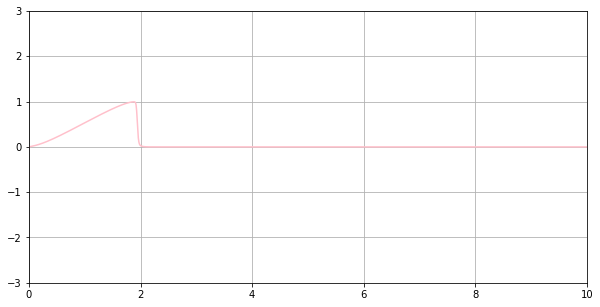

In [45]:
from matplotlib.animation import FuncAnimation, PillowWriter

aa = 2
h = 0.01
xmin = 0
xmax = 10

C = 0.9


xn = np.arange(xmin, xmax + h, h)
u3 = phi(xn)

tau = (C * h) / max(a(u3,aa))
u4 = layer(u3, xn, h, tau, aa)


# C =  tau**(len(u2)) * (a(u2, aa)) / h
if C <= 1:
  print ('OK')


fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(0, 10), ylim=(-3, 3))
ax.grid(True)
line, = ax.plot([], [], color = 'pink')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global u3,u4
    if i == 0:
        y = u3
    elif i == 1:
        y = u4
    else:
        u3 = np.copy(u4)
        tau = (C * h) / max(a(u3,aa))
        u4 = layer(u3, xn, h, tau, aa)
        y = u4

    line.set_data(xn, y)
    return line,

anim1 = FuncAnimation(fig, animate, init_func=init,
                      frames=100, interval=50, blit=True)

anim1.save('wave2.gif', writer='pillow')